# Multivariable Linear Regression
The task is to find an optimal set of weights to reduce the reducable error.

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import smpl_linear

%matplotlib inline

## Import the data

In [2]:
path = "../../data/Advertising.csv"
data = pd.read_csv(path)
data.drop(data.columns[0], axis = 1, inplace = True)
display(data)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Prepare the data
The goal now will be to normalize our features so they are all in the range -1 to 1.

In [3]:
# Normalize the data
data = smpl_linear.normalize(data)

In [4]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [5]:
X

,Ones,TV,radio,newspaper
0,1,0.967425,0.979066,1.774493
1,1,-1.194379,1.080097,0.667903
2,1,-1.512360,1.524637,1.779084
3,1,0.051919,1.214806,1.283185
4,1,0.393196,-0.839507,1.278593
...,...,...,...,...
195,1,-1.267759,-1.317724,-0.769287
196,1,-0.615491,-1.236899,-1.031011
197,1,0.348934,-0.940539,-1.109069
198,1,1.590574,1.261955,1.636743


In [6]:
# Initialize weights
theta = np.matrix(np.array([0,0,0,0]))
X = np.matrix(X.values)
y = np.matrix(y.values)

In [7]:
X.shape, theta.shape, y.shape

((200, 4), (1, 4), (200, 1))

## Fit the model parameters and compute the error

In [9]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = smpl_linear.gradientDescent(X, y, theta, alpha, iters)
g

matrix([[ 2.77622370e-16,  7.53028970e-01,  5.36055111e-01,
         -3.89429686e-03]])

In [10]:
smpl_linear.computeCost(X, y, theta)

0.49750000000000016

## Visualiize the results

Text(0.5, 1.0, 'Error vs. Training Epoch')

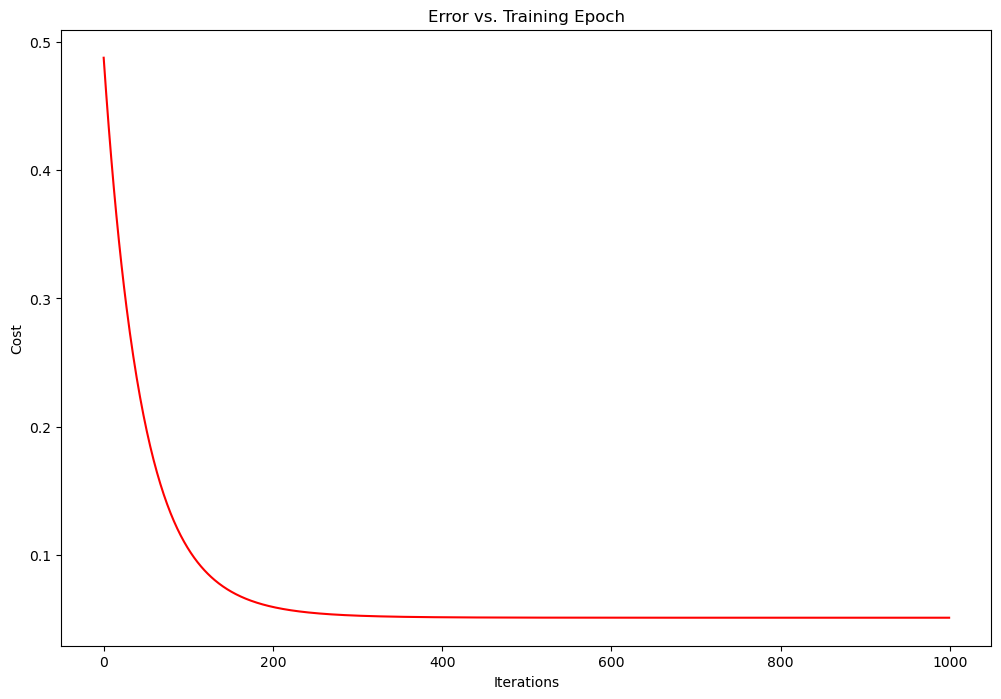

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')